# Capstone Project - The Battle of the Neighborhoods (Week 2)

### Housing Sales price Analysis of Chennai and a small peek at their neighborhoods

### Introduction to the Business problem

#### Chennai is one of the Metropolitan cities located in Southern part of India. Chennai is the capital of Tamil Nadu which serves as biggest cultural, economic and educational center of South India.
#### According to 2011 census this city is sixth most populated city of India and together with adjoining regions is 36th-largest urban area by population in the world.
#### With above said growth rate and people moving towards Chennai urban area, we are trying to find best neighborhoods for migrated people to settle down based upon housing prices.and little details on neighborhood.


## Part 1

The aim of this part is to find the housing sales price for various areas of Chennai and try to find the relationship between sale prices and the factors influencing them.
    Data from two sources has been used,
    * A CSV file containing various neighborhoods and their corresponding zipcodes(SOURCE : http://www.mapsofindia.com/pincode/india/tamil-nadu/chennai/).
    * A CSV file containing the sale price of houses on different neighborhoods of chennai and other properties which may influence the sales price (Source : https://www.kaggle.com/nishant4k/chennai-house-pricing-).

In [1]:
import pandas as pd
htmlsource='https://www.mapsofindia.com/pincode/india/tamil-nadu/chennai/'
dfC=pd.read_html(htmlsource)
dfche=dfC[0].iloc[1:]
dfche.columns=['AREA','Pincode','State','District']
dfche.head()

,AREA,Pincode,State,District
1,Abiramapuram,600018,Tamil Nadu,Chennai
2,Adyar,600020,Tamil Nadu,Chennai
3,Agaram,600082,Tamil Nadu,Chennai
4,Aminjikarai,600029,Tamil Nadu,Chennai
5,Anna Nagar,600040,Tamil Nadu,Chennai


## DATA WRANGLING
   After loading the initial data which contains zip codes of chennai city and looking at it , there are certain data which were missing from the file.
   Since the source only has zip codes of chennai area but we are going to analyse the zip codes which comes under Chennai Metropolitan area and has been a great contribution for 
   popluation migration , we are going to add some zipcodes manually to them.

In [2]:
listOfSeries = [pd.Series(['Chrompet',600044, 'Tamil Nadu', 'Chennai'], index=dfche.columns ) ,
                pd.Series(['K.K.Nagar',600078, 'Tamil Nadu', 'Chennai'], index=dfche.columns ) ,
                pd.Series(['Karapakkam',600097, 'Tamil Nadu', 'Chennai'], index=dfche.columns ) ]
mdfche = dfche.append(listOfSeries , ignore_index=True)


###### Next set of data which has all details of housing sales price details and factors that might influece it

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_11a4fe770d6b424da282044592f17e13 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jQoWCSUL-iSR3mz-0K4pv2D7ZTvphyBwCXPFlYVW_Z4c',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_11a4fe770d6b424da282044592f17e13.get_object(Bucket='finalproject-donotdelete-pr-q4hx2qkdr8ytvm',Key='Housing.CSV')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_Housing = pd.read_csv(body)
df_Housing.head()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,4/5/2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,4/2/2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,5/10/2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


###### Let's take necessary columns from main data and make a seperate DataFrame which we will use for further analysis

In [4]:
df_housing=df_Housing[df_Housing.N_BEDROOM!='']
df_housing.shape
df_hou=df_housing[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','PARK_FACIL','SALES_PRICE','DIST_MAINROAD']]
df_hou.head()
df_hou.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


(7109, 8)

#### Data wrangling in order to make the data into required format so that it will be easy for our analysis

In [5]:
df_hou['PARK_FACIL']=df_hou['PARK_FACIL'].replace({'Yes':1,'No':0})# Labeling data so that we can analyse if categorical data has influence on sales price
df_hou.head()
df_hou.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(7109, 8)

In [6]:
## Renaming the neighborhoods with their Official names

df_hou['AREA']=df_hou['AREA'].replace({'Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar'})
df_hou['AREA']=df_hou['AREA'].replace({'Adyr':'Adyar'})
df_hou['AREA']=df_hou['AREA'].replace({'TNagar':'Thygaraya Nagar','T Nagar':'Thygaraya Nagar'})
df_hou['AREA']=df_hou['AREA'].replace({'velachery':'velacheri','velchery':'velacheri'})
df_hou['AREA']=df_hou['AREA'].replace({'KKNagar':'K.K.Nagar','KK Nagar':'K.K.Nagar'})
df_hou['AREA']=df_hou['AREA'].replace({'Karapakam':'Karapakkam'})
df_hou['AREA']=df_hou['AREA'].replace({'Chrmpet':'Chrompet','Chrompt':'Chrompet','Chormpet':'Chrompet'})



/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

#### Once we are satisfied with the data from 2 data sets let us merge them into single data frame which will be our main data to be analysed

In [7]:
df_hou.set_index("AREA")
mdfche.set_index("AREA")
Chennai_data=pd.merge(df_hou, mdfche)
Chennai_data.shape
Chennai_data.head()
Chennai_data.shape


(6128, 11)

In [8]:
Chennai_data.sort_values(by='SALES_PRICE', ascending=True)


,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,DIST_MAINROAD,Pincode,State,District
653,Karapakkam,521,1.0,1.0,2,0,2156875,51,600097,Tamil Nadu,Chennai
265,Karapakkam,617,1.0,1.0,2,0,2476375,74,600097,Tamil Nadu,Chennai
463,Karapakkam,681,1.0,1.0,2,0,2640250,59,600097,Tamil Nadu,Chennai
577,Karapakkam,592,1.0,1.0,2,0,2797250,109,600097,Tamil Nadu,Chennai
290,Karapakkam,728,1.0,1.0,2,0,2939750,97,600097,Tamil Nadu,Chennai
447,Karapakkam,533,1.0,1.0,2,0,3000375,84,600097,Tamil Nadu,Chennai
575,Karapakkam,656,1.0,1.0,2,0,3001250,112,600097,Tamil Nadu,Chennai
114,Karapakkam,542,1.0,1.0,2,0,3013500,178,600097,Tamil Nadu,Chennai
943,Karapakkam,818,1.0,1.0,2,0,3029750,124,600097,Tamil Nadu,Chennai
1268,Karapakkam,525,1.0,1.0,2,0,3081375,21,600097,Tamil Nadu,Chennai


### Importing the necessary python libraries that will be used for Visualisation and analysis

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Let us visualise 4 factors and their trends so that we can determine if it will be used for our analysis

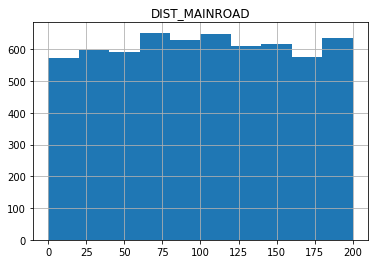

In [10]:
viz = Chennai_data[['DIST_MAINROAD']]
viz.hist()
plt.show()

## Plot the above factors against the sales price and find the linearity of their relationship using scatter plot

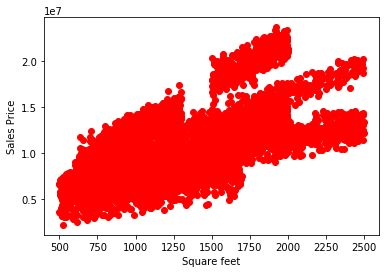

In [11]:
plt.scatter(x=Chennai_data.INT_SQFT, y=Chennai_data.SALES_PRICE,  color='Red')
plt.xlabel("Square feet")
plt.ylabel("Sales Price")
plt.show()

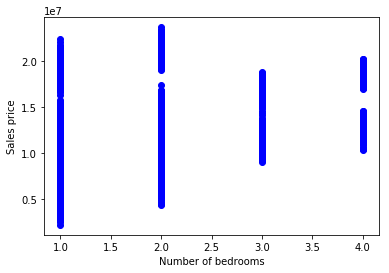

In [12]:
plt.scatter(x=Chennai_data.N_BEDROOM, y=Chennai_data.SALES_PRICE,  color='Blue')
plt.xlabel("Number of bedrooms")
plt.ylabel("Sales price")
plt.show()

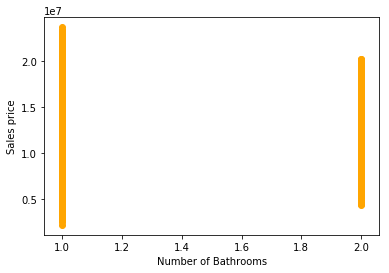

In [13]:
plt.scatter(x=Chennai_data.N_BATHROOM, y=Chennai_data.SALES_PRICE,  color='Orange')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sales price")
plt.show()

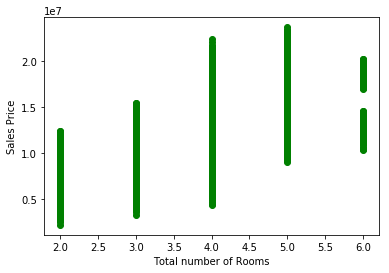

In [14]:
plt.scatter(x=Chennai_data.N_ROOM, y=Chennai_data.SALES_PRICE,  color='Green')
plt.xlabel("Total number of Rooms")
plt.ylabel("Sales Price")
plt.show()

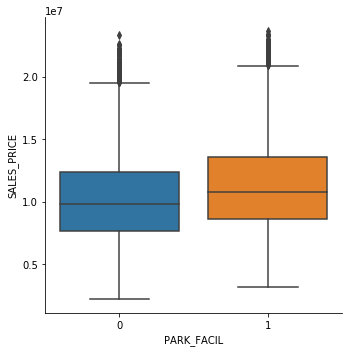

In [15]:
import seaborn as sns
sns.catplot(x="PARK_FACIL", y="SALES_PRICE", kind="box", data=Chennai_data);

In [16]:
#Chennai_data=Chennai_data.dropna(axis=0,inplace=True)

Chennai_data.dropna(how="any", inplace=True)
Chennai_data = Chennai_data.fillna("", inplace=False)
Chennai_data.head()


,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,DIST_MAINROAD,Pincode,State,District
0,Karapakkam,1004,1.0,1.0,3,1,7600000,131,600097,Tamil Nadu,Chennai
1,Karapakkam,1226,1.0,1.0,3,1,7406250,84,600097,Tamil Nadu,Chennai
2,Karapakkam,1639,2.0,2.0,4,1,8656000,175,600097,Tamil Nadu,Chennai
3,Karapakkam,1301,1.0,1.0,3,1,7939625,59,600097,Tamil Nadu,Chennai
4,Karapakkam,1226,1.0,1.0,3,0,4971250,180,600097,Tamil Nadu,Chennai


In [17]:
Chennai_data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,DIST_MAINROAD,Pincode,State,District
0,Karapakkam,1004,1.0,1.0,3,1,7600000,131,600097,Tamil Nadu,Chennai
1,Karapakkam,1226,1.0,1.0,3,1,7406250,84,600097,Tamil Nadu,Chennai
2,Karapakkam,1639,2.0,2.0,4,1,8656000,175,600097,Tamil Nadu,Chennai
3,Karapakkam,1301,1.0,1.0,3,1,7939625,59,600097,Tamil Nadu,Chennai
4,Karapakkam,1226,1.0,1.0,3,0,4971250,180,600097,Tamil Nadu,Chennai


## Multiple Linear Regression Model

In [18]:
csk = np.random.rand(len(Chennai_data)) < 0.8
train = Chennai_data[csk]
test = Chennai_data[~csk]

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','DIST_MAINROAD']])
#x = np.asanyarray(train[['N_BEDROOM','N_BATHROOM','N_ROOM']])
y = np.asanyarray(train[['SALES_PRICE']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 3.43630259e+03 -1.47755823e+06 -2.20997372e+06  2.32117110e+06
   6.58189561e+02]]


In [20]:
y_hat= regr.predict(test[['INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','DIST_MAINROAD']])
#y_hat= regr.predict(test[['N_BEDROOM','N_BATHROOM','N_ROOM']])
x = np.asanyarray(test[['INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','DIST_MAINROAD']])
#x = np.asanyarray(test[['N_BEDROOM','N_BATHROOM','N_ROOM']])
y = np.asanyarray(test[['SALES_PRICE']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 7024775040768.89
Variance score: 0.54


###### Multiple linear regression model with (Square feet,No of bedrooms,No of bathrooms, Total number of rooms) VS Sales price
Residual sum of squares: 7169165662698.36
Variance score: 0.56

In [21]:
x1= np.asanyarray(train[['INT_SQFT','N_ROOM']])
y1= np.asanyarray(train[['SALES_PRICE']])
regr.fit (x1, y1)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[  4036.23895176 699668.82429433]]


In [22]:
from sklearn.metrics import explained_variance_score as evp


In [23]:
y_hat1= regr.predict(test[['INT_SQFT','N_ROOM']])
x1 = np.asanyarray(test[['INT_SQFT','N_ROOM']])
y1 = np.asanyarray(test[['SALES_PRICE']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat1 - y1) ** 2))

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % regr.score(x1, y1))
print('explained variance score: %.2f' % evp(y1, y_hat1))

Residual sum of squares: 8360138015735.09
Variance score: 0.45
explained variance score: 0.45


###### Multiple linear regression model with (Square feet, Total number of rooms) VS Sales price

Residual sum of squares: 9250491595346.42
Variance score: 0.40
explained variance score: 0.41


### Logistic regression model with No of rooms VS Sales price

In [24]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

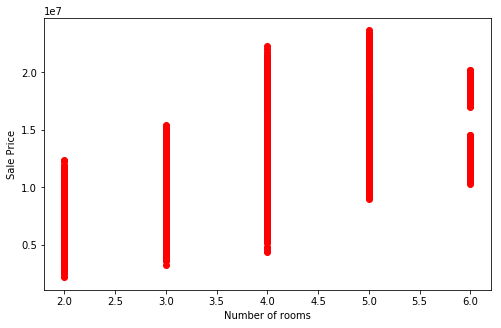

In [25]:
plt.figure(figsize=(8,5))
x_data, y_data = (Chennai_data["N_ROOM"].values, Chennai_data["SALES_PRICE"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Sale Price')
plt.xlabel('Number of rooms')
plt.show()

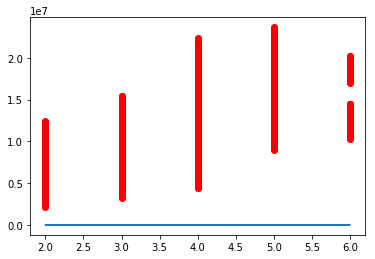

In [26]:
#logistic function
beta_1 = 0.10
beta_2 = 1990.0
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [27]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [28]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 2.598767, beta_2 = 0.660431


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


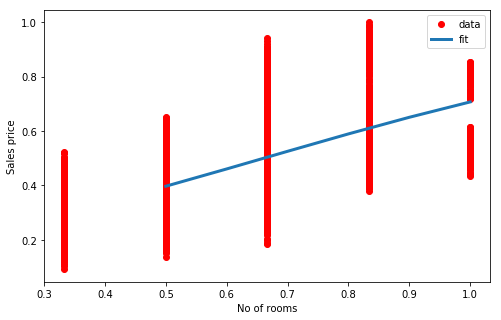

In [29]:
x = np.linspace(2.0, 4.0, 6.0)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Sales price')
plt.xlabel('No of rooms')
plt.show()

In [30]:

# split data into train/test
csk = np.random.rand(len(Chennai_data)) < 0.8
train_x = xdata[csk]
test_x = xdata[~csk]
train_y = ydata[csk]
test_y = ydata[~csk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )



Mean absolute error: 0.10
Residual sum of squares (MSE): 0.02
R2-score: -0.33


##### Polynomial regression model

In [31]:
csk = np.random.rand(len(Chennai_data)) < 0.8
train = Chennai_data[csk]
test = Chennai_data[~csk]

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['N_ROOM']])
train_y = np.asanyarray(train[['SALES_PRICE']])

test_x = np.asanyarray(test[['N_ROOM']])
test_y = np.asanyarray(test[['SALES_PRICE']])

poly = PolynomialFeatures(degree=7)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000e+00, 3.0000e+00, 9.0000e+00, ..., 2.4300e+02, 7.2900e+02,
        2.1870e+03],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, ..., 2.4300e+02, 7.2900e+02,
        2.1870e+03],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, ..., 1.0240e+03, 4.0960e+03,
        1.6384e+04],
       ...,
       [1.0000e+00, 5.0000e+00, 2.5000e+01, ..., 3.1250e+03, 1.5625e+04,
        7.8125e+04],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, ..., 3.1250e+03, 1.5625e+04,
        7.8125e+04],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, ..., 1.0240e+03, 4.0960e+03,
        1.6384e+04]])

In [33]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[     0.          18777.24076917  63582.75709043 128718.0231637
  129616.50608994 -84403.71917508  17035.55892235  -1169.89504137]]
Intercept:  [5339026.85867338]


Text(0, 0.5, 'Salesprice')

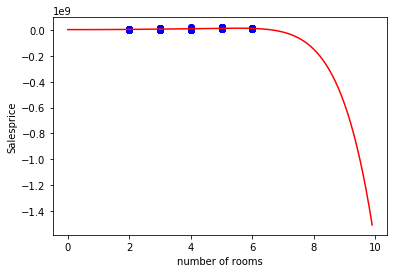

In [34]:
plt.scatter(train.N_ROOM, train.SALES_PRICE,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX  + clf.coef_[0][2]*np.power(XX, 2)+clf.coef_[0][3]*np.power(XX, 3)+clf.coef_[0][4]*np.power(XX, 4)+clf.coef_[0][5]*np.power(XX, 5)+clf.coef_[0][6]*np.power(XX, 6)+clf.coef_[0][7]*np.power(XX, 7)
plt.plot(XX, yy, '-r' )
plt.xlabel("number of rooms")
plt.ylabel("Salesprice")

In [35]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 2288316.48
Residual sum of squares (MSE): 8655270492758.57
R2-score: -0.24


## A Peak into Neighborhoods of Chennai

In [36]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 92kB 18.1MB/s eta 0:00:01
Libraries imported.


In [37]:
# Fetching lat, Lon values of Chennai
address = 'Chennai,Tamil Nadu, India'

geolocator = Nominatim(user_agent="ch_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chennai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chennai are 13.0801721, 80.2838331.


In [38]:
# Testing the format of address to pass into Geocoder
from geopy.geocoders import Nominatim
geolocator1 = Nominatim(user_agent="ch_explorer")
location1 = geolocator1.geocode('Thyagaraya Nagar')
latitude11 = location1.latitude
longitude = location1.longitude
print('The geograpical coordinate of Abhiramapuram are {}, {}.'.format(latitude11, longitude))
                        

The geograpical coordinate of Abhiramapuram are 13.0404986, 80.2359547.


In [39]:
Chennai_data['AREA']=Chennai_data['AREA'].replace({'Thygaraya Nagar':'Thyagaraya Nagar'})

##### We are going to get unique vales of neighborhoods from sales data set and apply geocoder function to get the Lat, Lon values and then merge them with original data set

In [40]:
Chdata=pd.DataFrame(Chennai_data['AREA'].unique())
Chdata.columns=['AREA']
Chdata

,AREA
0,Karapakkam
1,Anna Nagar
2,Adyar
3,Chrompet
4,K.K.Nagar
5,Thyagaraya Nagar


In [41]:
Chdata['latitude']=Chdata['AREA'].apply(geolocator.geocode).apply(lambda x: (x.latitude))
print("Latitude is plotted")

Latitude is plotted


In [42]:
Chdata['longitude']=Chdata['AREA'].apply(geolocator.geocode).apply(lambda x: (x.longitude))
print("longitude is plotted")

longitude is plotted


In [43]:
Chdata

,AREA,latitude,longitude
0,Karapakkam,12.911707,80.227720
1,Anna Nagar,11.170349,77.351114
2,Adyar,13.006450,80.257779
3,Chrompet,12.939421,80.136613
4,K.K.Nagar,11.310657,77.705097
5,Thyagaraya Nagar,13.040499,80.235955


In [44]:
Chdata.set_index("AREA")
Chennai_data.set_index("AREA")
chennai_data=pd.merge(Chennai_data, Chdata)
chennai_data.shape
chennai_data.head()
chennai_data.shape


(6122, 13)

In [45]:
chennai_data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,DIST_MAINROAD,Pincode,State,District,latitude,longitude
0,Karapakkam,1004,1.0,1.0,3,1,7600000,131,600097,Tamil Nadu,Chennai,12.911707,80.227720
1,Karapakkam,1226,1.0,1.0,3,1,7406250,84,600097,Tamil Nadu,Chennai,12.911707,80.227720
2,Karapakkam,1639,2.0,2.0,4,1,8656000,175,600097,Tamil Nadu,Chennai,12.911707,80.227720
3,Karapakkam,1301,1.0,1.0,3,1,7939625,59,600097,Tamil Nadu,Chennai,12.911707,80.227720
4,Karapakkam,1226,1.0,1.0,3,0,4971250,180,600097,Tamil Nadu,Chennai,12.911707,80.227720
5,Karapakkam,931,1.0,1.0,3,0,6944500,16,600097,Tamil Nadu,Chennai,12.911707,80.227720
6,Karapakkam,1290,1.0,1.0,3,1,7745000,86,600097,Tamil Nadu,Chennai,12.911707,80.227720
7,Karapakkam,507,1.0,1.0,2,1,5728000,49,600097,Tamil Nadu,Chennai,12.911707,80.227720
8,Karapakkam,851,1.0,1.0,2,0,3572250,105,600097,Tamil Nadu,Chennai,12.911707,80.227720
9,Karapakkam,1412,2.0,2.0,4,0,8379000,28,600097,Tamil Nadu,Chennai,12.911707,80.227720


In [46]:
Chennai_data.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,DIST_MAINROAD
count,6122.000000,6122.000000,6122.000000,6122.000000,6122.00000,6.122000e+03,6122.000000
mean,1324.562561,1.519275,1.187520,3.578896,0.50098,1.087032e+07,100.337798
std,464.351265,0.780859,0.390361,1.039522,0.50004,3.907480e+06,57.110376
min,500.000000,1.000000,1.000000,2.000000,0.00000,2.156875e+06,0.000000
25%,943.000000,1.000000,1.000000,3.000000,0.00000,8.149410e+06,51.000000
50%,1241.500000,1.000000,1.000000,4.000000,1.00000,1.030442e+07,100.000000
75%,1685.000000,2.000000,1.000000,4.000000,1.00000,1.295609e+07,148.000000
max,2500.000000,4.000000,2.000000,6.000000,1.00000,2.366734e+07,200.000000


## Creating a new data frame with mean values of house sales price against each neighborhood

In [47]:
chennai_data.groupby(['AREA','Pincode','State','District'])['latitude','longitude','SALES_PRICE'].mean()

,,,,latitude,longitude,SALES_PRICE
AREA,Pincode,State,District,,,
Adyar,600020,Tamil Nadu,Chennai,13.006450,80.257779,9.185668e+06
Anna Nagar,600040,Tamil Nadu,Chennai,11.170349,77.351114,1.517704e+07
Chrompet,600044,Tamil Nadu,Chennai,12.939421,80.136613,1.001515e+07
K.K.Nagar,600078,Tamil Nadu,Chennai,11.310657,77.705097,1.269623e+07
Karapakkam,600097,Tamil Nadu,Chennai,12.911707,80.227720,7.340100e+06
Thyagaraya Nagar,600017,Tamil Nadu,Chennai,13.040499,80.235955,1.561674e+07


In [48]:
finalchennai_data=pd.DataFrame(chennai_data.groupby(['AREA','Pincode','State','District'])['latitude','longitude','SALES_PRICE'].mean())

In [56]:
finalchennai_data=finalchennai_data.reset_index(level='Pincode')
finalchennai_data

,Pincode,State,District,AREA,latitude,longitude,SALES_PRICE
0,600020,Tamil Nadu,Chennai,Adyar,13.006450,80.257779,9.185668e+06
1,600040,Tamil Nadu,Chennai,Anna Nagar,11.170349,77.351114,1.517704e+07
2,600044,Tamil Nadu,Chennai,Chrompet,12.939421,80.136613,1.001515e+07
3,600078,Tamil Nadu,Chennai,K.K.Nagar,11.310657,77.705097,1.269623e+07
4,600097,Tamil Nadu,Chennai,Karapakkam,12.911707,80.227720,7.340100e+06
5,600017,Tamil Nadu,Chennai,Thyagaraya Nagar,13.040499,80.235955,1.561674e+07


In [50]:
finalchennai_data['SALES_PRICE'].max()

15616742.59481038

In [51]:
map_Chennai = folium.Map(location=[latitude, longitude], zoom_start=11)
Geo=f'https://raw.githubusercontent.com/AkilaBalasundaram/Coursera_Capstone/master/Chennai.json'


#add markers to map
for lat, lng, label in zip(finalchennai_data['latitude'], finalchennai_data['longitude'],finalchennai_data['AREA']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
       [lat, lng],
        radius=5,
        popup=label,
        color='blue',
       fill=True,
       fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Chennai) 
    

    
map_Chennai

In [52]:
CLIENT_ID = 'SNW3AWGCGRA32442BPBAUOHTSM2REBMLQZVD3XHWSQ4YUIIP' # your Foursquare ID
CLIENT_SECRET = 'GUS1WVKVBQBDW5V53PESZZ2MWRRQKT4PV1UUZEZLCRU3ZUYH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SNW3AWGCGRA32442BPBAUOHTSM2REBMLQZVD3XHWSQ4YUIIP
CLIENT_SECRET:GUS1WVKVBQBDW5V53PESZZ2MWRRQKT4PV1UUZEZLCRU3ZUYH


In [57]:
finalchennai_data.loc[0, 'AREA']

'Adyar'

In [58]:
neighborhood_latitude = finalchennai_data.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = finalchennai_data.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = finalchennai_data.loc[0, 'AREA'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Adyar are 13.006450000000063, 80.2577791000003.


In [59]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url# Displays the url

'https://api.foursquare.com/v2/venues/explore?&client_id=SNW3AWGCGRA32442BPBAUOHTSM2REBMLQZVD3XHWSQ4YUIIP&client_secret=GUS1WVKVBQBDW5V53PESZZ2MWRRQKT4PV1UUZEZLCRU3ZUYH&v=20180605&ll=13.006450000000063,80.2577791000003&radius=500&limit=100'

In [62]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dcad86ed0a149002c1ff4ae'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Chennai',
  'headerFullLocation': 'Chennai',
  'headerLocationGranularity': 'city',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 13.010950004500067,
    'lng': 80.26238896991103},
   'sw': {'lat': 13.001949995500059, 'lng': 80.25316923008958}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55b9abc8498ecf5798ac0d58',
       'name': 'Bombay Brassiere',
       'location': {'address': 'Adyar',
        'lat': 13.006961450666138,
        'lng': 80.25641939452001,
        'labeledLatLngs': [{'label': 'display',
          'lat': 13.006961450666138,
          'lng'

In [60]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [63]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Bombay Brassiere,North Indian Restaurant,13.006961,80.256419
1,Cool Biz,Juice Bar,13.006632,80.257275
2,Adyar Ananda Bhavan,Indian Restaurant,13.005824,80.257368
3,Aavin Milk Booth,Grocery Store,13.007646,80.259153
4,Prems Graama Bhojanam,Vegetarian / Vegan Restaurant,13.006345,80.253995
5,McDonald's,Fast Food Restaurant,13.006632,80.254255
6,M'bessy,Lounge,13.007361,80.259560
7,Rainforest Restaurant,Indian Restaurant,13.006993,80.257767
8,Daawat The Kebab Shop,North Indian Restaurant,13.006689,80.253728
9,Hotel Coronet,Indian Restaurant,13.006548,80.257307


In [64]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


In [66]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [67]:
Chennai_venues = getNearbyVenues(names=finalchennai_data['AREA'],
                                   latitudes=finalchennai_data['latitude'],
                                   longitudes=finalchennai_data['longitude']
                                  )

Adyar
Anna Nagar
Chrompet
K.K.Nagar
Karapakkam
Thyagaraya Nagar


In [68]:
print(Chennai_venues.shape)
Chennai_venues

(71, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adyar,13.006450,80.257779,Bombay Brassiere,13.006961,80.256419,North Indian Restaurant
1,Adyar,13.006450,80.257779,Cool Biz,13.006632,80.257275,Juice Bar
2,Adyar,13.006450,80.257779,Adyar Ananda Bhavan,13.005824,80.257368,Indian Restaurant
3,Adyar,13.006450,80.257779,Aavin Milk Booth,13.007646,80.259153,Grocery Store
4,Adyar,13.006450,80.257779,Prems Graama Bhojanam,13.006345,80.253995,Vegetarian / Vegan Restaurant
5,Adyar,13.006450,80.257779,McDonald's,13.006632,80.254255,Fast Food Restaurant
6,Adyar,13.006450,80.257779,M'bessy,13.007361,80.259560,Lounge
7,Adyar,13.006450,80.257779,Rainforest Restaurant,13.006993,80.257767,Indian Restaurant
8,Adyar,13.006450,80.257779,Daawat The Kebab Shop,13.006689,80.253728,North Indian Restaurant
9,Adyar,13.006450,80.257779,Hotel Coronet,13.006548,80.257307,Indian Restaurant


In [70]:
dfche_count=pd.DataFrame(Chennai_venues.groupby('Neighborhood')['Venue'].count())

dfche_count

,Venue
Neighborhood,
Adyar,30
Chrompet,4
Karapakkam,4
Thyagaraya Nagar,33


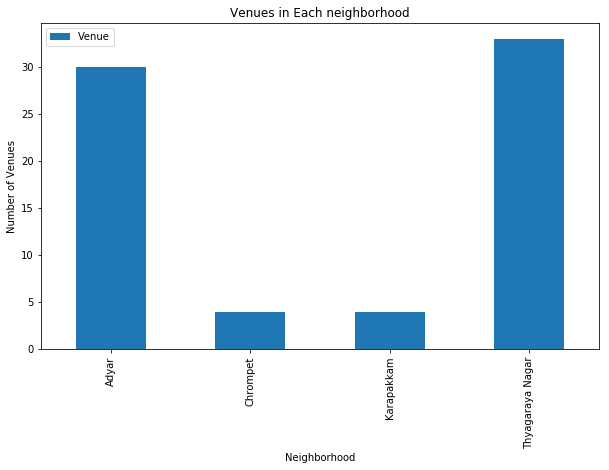

In [71]:
dfche_count.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Venues in Each neighborhood') # add title to the plot

plt.show()

In [72]:
chennai_onehot = pd.get_dummies(Chennai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chennai_onehot['Neighborhood'] = Chennai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chennai_onehot.columns[-1]] + list(chennai_onehot.columns[:-1])
chennai_onehot = chennai_onehot[fixed_columns]

chennai_onehot.head()

,Neighborhood,Asian Restaurant,Bakery,Bookstore,Boutique,Café,Clothing Store,Coffee Shop,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Jewelry Store,Juice Bar,Lounge,Market,Miscellaneous Shop,Movie Theater,North Indian Restaurant,Park,Pizza Place,Rock Club,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Vegetarian / Vegan Restaurant,Women's Store
0,Adyar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Adyar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adyar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adyar,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Adyar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [73]:
chennai_grouped = chennai_onehot.groupby('Neighborhood').mean().reset_index()
chennai_grouped

,Neighborhood,Asian Restaurant,Bakery,Bookstore,Boutique,Café,Clothing Store,Coffee Shop,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Jewelry Store,Juice Bar,Lounge,Market,Miscellaneous Shop,Movie Theater,North Indian Restaurant,Park,Pizza Place,Rock Club,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Vegetarian / Vegan Restaurant,Women's Store
0,Adyar,0.033333,0.00,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.066667,0.033333,0.033333,0.033333,0.033333,0.30000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.033333,0.033333,0.000000,0.00,0.033333,0.033333,0.000000
1,Chrompet,0.000000,0.00,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,Karapakkam,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000
3,Thyagaraya Nagar,0.000000,0.00,0.000000,0.030303,0.030303,0.181818,0.030303,0.030303,0.030303,0.000000,0.030303,0.000000,0.000000,0.000000,0.30303,0.000000,0.030303,0.000000,0.000000,0.030303,0.030303,0.000000,0.000000,0.060606,0.030303,0.000000,0.000000,0.030303,0.00,0.030303,0.060606,0.030303


In [74]:
num_top_venues = 5

for hood in chennai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =chennai_grouped[chennai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adyar----
                     venue  freq
0        Indian Restaurant  0.30
1  North Indian Restaurant  0.07
2        Electronics Store  0.07
3            Grocery Store  0.03
4            Movie Theater  0.03


----Chrompet----
               venue  freq
0  Indian Restaurant  0.25
1      Movie Theater  0.25
2     Clothing Store  0.25
3        Coffee Shop  0.25
4   Asian Restaurant  0.00


----Karapakkam----
               venue  freq
0             Bakery  0.25
1  Indian Restaurant  0.25
2     Shopping Plaza  0.25
3      Movie Theater  0.25
4               Park  0.00


----Thyagaraya Nagar----
                           venue  freq
0              Indian Restaurant  0.30
1                 Clothing Store  0.18
2  Vegetarian / Vegan Restaurant  0.06
3                           Park  0.06
4                  Jewelry Store  0.03




In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [76]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chennai_grouped['Neighborhood']

for ind in np.arange(chennai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,Indian Restaurant,Electronics Store,North Indian Restaurant,Italian Restaurant,Juice Bar,Bookstore,Café,Coffee Shop,Dessert Shop,Fast Food Restaurant
1,Chrompet,Indian Restaurant,Clothing Store,Coffee Shop,Movie Theater,Women's Store,Bakery,Bookstore,Boutique,Café,Department Store
2,Karapakkam,Movie Theater,Bakery,Shopping Plaza,Indian Restaurant,Women's Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Dessert Shop
3,Thyagaraya Nagar,Indian Restaurant,Clothing Store,Vegetarian / Vegan Restaurant,Park,Miscellaneous Shop,Dessert Shop,Jewelry Store,Department Store,Coffee Shop,Market


In [77]:
# set number of clusters
kclusters = 3

chennai_grouped_clustering = chennai_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chennai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 1, 0], dtype=int32)

In [78]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chennai_merged = finalchennai_data
chennai_merged.rename(columns={'AREA':'Neighborhood'},inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chennai_merged =chennai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

chennai_merged.head() # check the last columns!


,Pincode,State,District,Neighborhood,latitude,longitude,SALES_PRICE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,600020,Tamil Nadu,Chennai,Adyar,13.006450,80.257779,9.185668e+06,0.0,Indian Restaurant,Electronics Store,North Indian Restaurant,Italian Restaurant,Juice Bar,Bookstore,Café,Coffee Shop,Dessert Shop,Fast Food Restaurant
1,600040,Tamil Nadu,Chennai,Anna Nagar,11.170349,77.351114,1.517704e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,600044,Tamil Nadu,Chennai,Chrompet,12.939421,80.136613,1.001515e+07,2.0,Indian Restaurant,Clothing Store,Coffee Shop,Movie Theater,Women's Store,Bakery,Bookstore,Boutique,Café,Department Store
3,600078,Tamil Nadu,Chennai,K.K.Nagar,11.310657,77.705097,1.269623e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,600097,Tamil Nadu,Chennai,Karapakkam,12.911707,80.227720,7.340100e+06,1.0,Movie Theater,Bakery,Shopping Plaza,Indian Restaurant,Women's Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Dessert Shop


In [79]:
chennai_merged.dropna(axis=0,inplace=True)
chennai_merged.rename(columns={'Cluster Labels':'ClusterLabels'},inplace=True)
chennai_merged['ClusterLabels']=chennai_merged['ClusterLabels'].astype(int)
chennai_merged

,Pincode,State,District,Neighborhood,latitude,longitude,SALES_PRICE,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,600020,Tamil Nadu,Chennai,Adyar,13.006450,80.257779,9.185668e+06,0,Indian Restaurant,Electronics Store,North Indian Restaurant,Italian Restaurant,Juice Bar,Bookstore,Café,Coffee Shop,Dessert Shop,Fast Food Restaurant
2,600044,Tamil Nadu,Chennai,Chrompet,12.939421,80.136613,1.001515e+07,2,Indian Restaurant,Clothing Store,Coffee Shop,Movie Theater,Women's Store,Bakery,Bookstore,Boutique,Café,Department Store
4,600097,Tamil Nadu,Chennai,Karapakkam,12.911707,80.227720,7.340100e+06,1,Movie Theater,Bakery,Shopping Plaza,Indian Restaurant,Women's Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Dessert Shop
5,600017,Tamil Nadu,Chennai,Thyagaraya Nagar,13.040499,80.235955,1.561674e+07,0,Indian Restaurant,Clothing Store,Vegetarian / Vegan Restaurant,Park,Miscellaneous Shop,Dessert Shop,Jewelry Store,Department Store,Coffee Shop,Market


In [97]:
Chennai_avg=chennai_merged.groupby('ClusterLabels')['SALES_PRICE'].mean()
Chennai_avg=pd.DataFrame(Chennai_avg)


,SALES_PRICE
ClusterLabels,
0,1.240121e+07
1,7.340100e+06
2,1.001515e+07


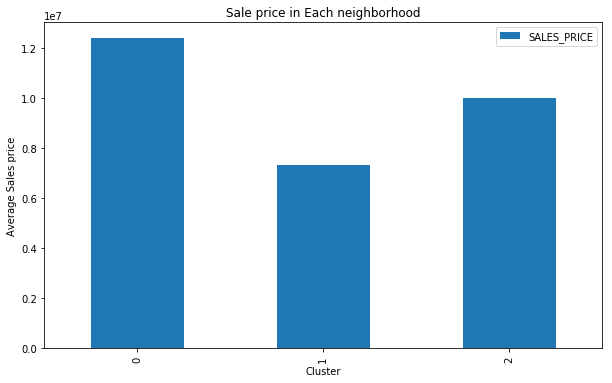

In [98]:
Chennai_avg.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cluster') # add to x-label to the plot
plt.ylabel('Average Sales price') # add y-label to the plot
plt.title('Sale price in Each neighborhood') # add title to the plot

plt.show()

In [80]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chennai_merged['latitude'],chennai_merged['longitude'], chennai_merged['Neighborhood'],chennai_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [81]:
chennai_merged.loc[chennai_merged['ClusterLabels'] == 0, chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

,State,longitude,SALES_PRICE,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Tamil Nadu,80.257779,9.185668e+06,0,Indian Restaurant,Electronics Store,North Indian Restaurant,Italian Restaurant,Juice Bar,Bookstore,Café,Coffee Shop,Dessert Shop,Fast Food Restaurant
5,Tamil Nadu,80.235955,1.561674e+07,0,Indian Restaurant,Clothing Store,Vegetarian / Vegan Restaurant,Park,Miscellaneous Shop,Dessert Shop,Jewelry Store,Department Store,Coffee Shop,Market


In [82]:
chennai_merged.loc[chennai_merged['ClusterLabels'] == 1, chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

,State,longitude,SALES_PRICE,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Tamil Nadu,80.22772,7.340100e+06,1,Movie Theater,Bakery,Shopping Plaza,Indian Restaurant,Women's Store,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Dessert Shop


In [83]:
chennai_merged.loc[chennai_merged['ClusterLabels'] == 2, chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

,State,longitude,SALES_PRICE,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Tamil Nadu,80.136613,1.001515e+07,2,Indian Restaurant,Clothing Store,Coffee Shop,Movie Theater,Women's Store,Bakery,Bookstore,Boutique,Café,Department Store
